In [ ]:
!pip install datasets evaluate transformers[sentencepiece]

In [ ]:
from datasets import load_dataset
import pandas as pd

In [ ]:
raw_dataset = load_dataset("yyu/amazon-attrprompt")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
raw_dataset

DatasetDict({
    train: Dataset({
        features: ['_id', 'text'],
        num_rows: 13820
    })
    validation: Dataset({
        features: ['_id', 'text'],
        num_rows: 230
    })
    test: Dataset({
        features: ['_id', 'text'],
        num_rows: 1130
    })
})

In [ ]:
type(raw_dataset)

datasets.dataset_dict.DatasetDict

In [ ]:
train_dataset = raw_dataset["train"]

In [ ]:
df = train_dataset.to_pandas()

In [ ]:
df.head()

,_id,text
0,0,Don't waste your time even just simply flippin...
1,0,Men's Health Magazine provides informationand ...
2,0,This magazine makes girls who feel geeky and n...
3,0,This is the worst magazine I have ever subscri...
4,0,"In the years I have taken this magazine, I hav..."


In [ ]:
value_counts = df["_id"].value_counts().sort_index()
value_counts

0     779
1     821
2     122
3     774
4     351
5     604
6     934
7       4
8     233
9     832
10    763
11    787
12    488
13    851
14    672
15    830
16    799
17    854
18    699
19    570
20     73
21    587
22    393
Name: _id, dtype: int64

In [ ]:
import matplotlib.pyplot as plt

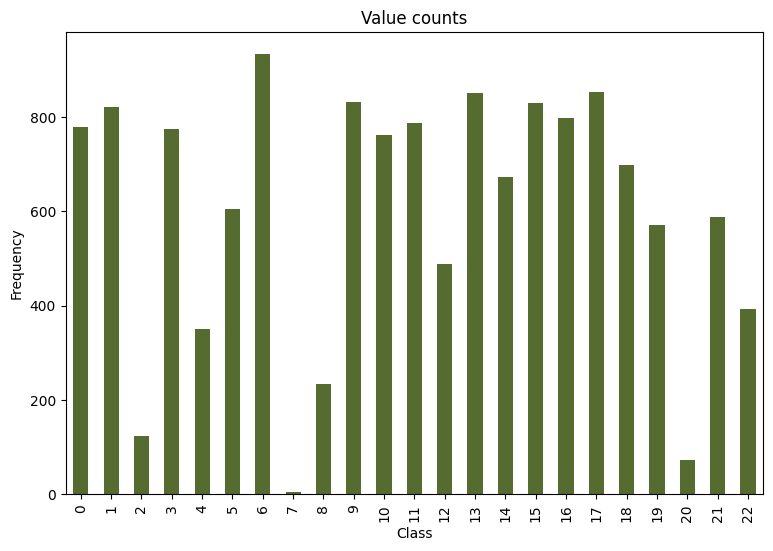

In [ ]:
plt.figure(figsize=(9, 6))
value_counts.plot(kind="bar", color="darkolivegreen")
plt.title("Value counts")
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()

In [ ]:
df['review_length'] = df['text'].str.len()

In [ ]:
df.iloc[0].text

"Don't waste your time even just simply flipping through this magazine at the newstand. Trust me... there will be no worthwhile patterns (I mean... just look at what they choose to grace their cover!!!) I have stopped hoping for even a half way decent pattern to come along during the two years or so. I have seen litteraly only ONE knittable pattern in the last three years (December 2004 I believe it was... a lace cardigan with beaded trim). Even the articles are pointless. Save your time and money and get a subscription to Interweave Knits or Vogue Knitting. Or opt for a new magazine (not available at all newstands in the US) called Simply Knitting, which is imported from the UK. It amazes me that this magazine is even still in production with how horible it is!!"

In [ ]:
len("Don't waste your time even just simply flipping through this magazine at the newstand. Trust me... there will be no worthwhile patterns (I mean... just look at what they choose to grace their cover!!!) I have stopped hoping for even a half way decent pattern to come along during the two years or so. I have seen litteraly only ONE knittable pattern in the last three years (December 2004 I believe it was... a lace cardigan with beaded trim). Even the articles are pointless. Save your time and money and get a subscription to Interweave Knits or Vogue Knitting. Or opt for a new magazine (not available at all newstands in the US) called Simply Knitting, which is imported from the UK. It amazes me that this magazine is even still in production with how horible it is!!")

772

In [ ]:
df['review_length'].head()

0     772
1     730
2     337
3     673
4    2148
Name: review_length, dtype: int64

In [ ]:
df.describe()

,_id,review_length
count,13820.000000,13820.000000
mean,10.926628,657.362808
std,6.371996,770.508069
min,0.000000,124.000000
25%,6.000000,278.000000
50%,11.000000,446.000000
75%,16.000000,757.000000
max,22.000000,31153.000000


In [ ]:
bins = [0, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1500, 2000, 5000, 10000, 20000, 31154]

In [ ]:
df['length_binned'] = pd.cut(df['review_length'], bins)

In [ ]:
bin_counts = df['length_binned'].value_counts().sort_index()
bin_counts

(0, 200]          1361
(200, 300]        2622
(300, 400]        2149
(400, 500]        1711
(500, 600]        1232
(600, 700]         896
(700, 800]         725
(800, 900]         536
(900, 1000]        433
(1000, 1500]      1142
(1500, 2000]       450
(2000, 5000]       508
(5000, 10000]       47
(10000, 20000]       7
(20000, 31154]       1
Name: length_binned, dtype: int64

In [ ]:
type(bin_counts)

pandas.core.series.Series

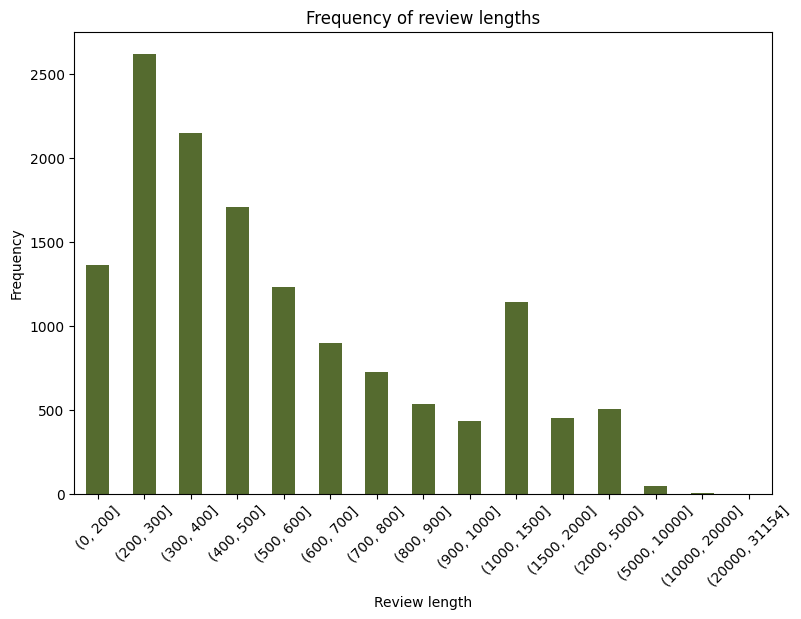

In [ ]:
plt.figure(figsize=(9, 6))
bin_counts.plot(kind="bar", color="darkolivegreen")
plt.title("Frequency of review lengths")
plt.xlabel("Review length")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()